# Student ID: 19012516

In [1]:
#Libraries used
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.distributions import chi2
from scipy.stats import t
from math import factorial
import matplotlib as mpl
import pandas as pd
mpl.rcParams['figure.figsize'] = [10.0, 6.0]#set chart sizes

# 1.i.
To access Bradford Data, the following steps were taken:

1. Accessed website http://www.metoffice.gov.uk/public/weather/climate-historic/#?tab=climateHistoric
2. Bradford selected in drop down box and *View Data* button pressed.
3. Page reviewed and following qualifications noted: "Estimated data is marked with a * after the value. Missing data (more than 2 days missing in month) is marked by ---."
4. Page saved as .txt file.
5. In text editor, descriptive text removed from first lines so single header row followed by data. File saved.
6. Excel spreadsheet opened and using menu Data/Get External Data/Import Text File... the previously saved .txt file was imported.
7. Column heading changed in Excel to be consistent with Appendix of problem sheet.
8. Data sorted by year. Data outside desired date range deleted.
9. Data sorted by month. Only month =8, i.e. August kept.
10. Year 1929 removed in line with Appendix (has three fields with "---", see above).
11. Column "af" removed as always zero and not in Appendix.
12. *'s removed as reviewing Appendix, these are not distinguished as estimated values in the Appendix.
13. Saved file as .csv. First few lines below:

Year,mm,Tmax C,Tmin C,rain,sun
<p>1911,8,21.6,12.5,51.8,204.8
<p>1912,8,15.1,9.2,144,87

In [272]:
#1.i.
df = pd.read_csv('Bradford.csv')#load as dataframe
print(df.head(2))

   Year  mm  Tmax C  Tmin C   rain    sun
0  1911   8    21.6    12.5   51.8  204.8
1  1912   8    15.1     9.2  144.0   87.0


In [288]:
#1.i.
print('Summary Statistics for Tmax (C)')
print('mean:','{:.2f}'.format(df['Tmax C'].mean()))
print('standard deviation:', '{:.2f}'.format(df['Tmax C'].std()))
print('variance:', '{:.2f}'.format(df['Tmax C'].std()**2))
N = df['Tmax C'].count()
print('standard error on mean:','{:.2f}'.format(df['Tmax C'].std()/N**0.5)) 


print('\nSummary Statistics for Tmin (C)')
print('mean:','{:.2f}'.format(df['Tmin C'].mean()))
print('standard deviation:', '{:.2f}'.format(df['Tmin C'].std()))
print('variance:', '{:.2f}'.format(df['Tmin C'].std()**2))
N = df['Tmin C'].count()
print('standard error on mean:','{:.2f}'.format(df['Tmin C'].std()/N**0.5))
print('\nall to 2 decimal places')


Summary Statistics for Tmax (C)
mean: 19.03
standard deviation: 1.56
variance: 2.45
standard error on mean: 0.15

Summary Statistics for Tmin (C)
mean: 11.45
standard deviation: 0.90
variance: 0.81
standard error on mean: 0.09

all to 2 decimal places


# 1.ii.


In [240]:
df2 = df[df['Year']<=2017]#new dataframe excluding 2018 onwards
print(df2.head(1))
print(df2.tail(1))#check it works

   Year  mm  Tmax C  Tmin C  rain    sun
0  1911   8    21.6    12.5  51.8  204.8
     Year  mm  Tmax C  Tmin C  rain    sun
105  2017   8    19.0    11.3  59.8  169.9


In [294]:
n = df2['Tmax C'].count()#N
m = df2['Tmax C'].mean()#mean
s = df2['Tmax C'].std()#standard deviation
s_e = s/n**0.5#standard error
c1 = 0.6#confidence
c2 = 0.9#confidence
i1 = s_e * t.ppf((1+c1)/2, n-1)#confidence interval for c1
#adapted from
#https://www.kite.com/python/examples/
#702/scipy-compute-a-confidence-interval-from-a-dataset
i2 = s_e * t.ppf((1+c2)/2, n-1)#confidence interval for c2
print('For tmax (C)')
print(f'{c1} confidence limits: {m-i1:0.2f} to {m+i1:0.2f}')
print(f'{c2} confidence limits: {m-i2:0.2f} to {m+i2:0.2f}')

n = df2['Tmin C'].count()
m = df2['Tmin C'].mean()
s = df2['Tmin C'].std()
s_e = s/n**0.5#standard error
c1 = 0.6#confidence
c2 = 0.9#confidence
i1 = s_e * t.ppf((1+c1)/2, n-1)#confidence interval
i2 = s_e * t.ppf((1+c2)/2, n-1)#confidence interval
print('\nFor tmin (C)')
print(f'{c1} confidence limits: {m-i1:0.2f} to {m+i1:0.2f}')
print(f'{c2} confidence limits: {m-i2:0.2f} to {m+i2:0.2f}')
print('\nconfidence limits shown to 2 decimal places')

For tmax (C)
0.6 confidence limits: 18.87 to 19.13
0.9 confidence limits: 18.74 to 19.25

For tmin (C)
0.6 confidence limits: 11.34 to 11.49
0.9 confidence limits: 11.27 to 11.56

confidence limits shown to 2 decimal places


# 1.iii.

In [295]:
df3 = df[df['Year']<=1920]#earlier data set
df4 = df[df['Year']>=1995]#later data set
print('df3 first and last rows')#print to verify
print(df3.head(1))
print(df3.tail(1))#print to verify
print('\ndf4 first and last rows')
print(df4.head(1))
print(df4.tail(1))

df3 first and last rows
   Year  mm  Tmax C  Tmin C  rain    sun
0  1911   8    21.6    12.5  51.8  204.8
   Year  mm  Tmax C  Tmin C  rain    sun
9  1920   8    16.4     9.7  42.7  111.7

df4 first and last rows
    Year  mm  Tmax C  Tmin C  rain    sun
83  1995   8    23.3    12.3   6.7  239.4
     Year  mm  Tmax C  Tmin C  rain    sun
108  2020   8    19.9    12.6  97.8  143.1


In [304]:
print('From 1911-1920')
print('Summary Statistics for Tmax (C)')
n = df3['Tmax C'].count()
m = df3['Tmax C'].mean()
s = df3['Tmax C'].std()
s_e = s/n**0.5#standard error
c1 = 0.6#confidence
c2 = 0.9#confidence
i1 = s_e * t.ppf((1+c1)/2, n-1)#confidence interval
i2 = s_e * t.ppf((1+c2)/2, n-1)#confidence interval
print(f'mean: {m:0.2f}')
print(f'standard deviation: {s:0.2f}')
print(f'variance: {s**2:0.2f}')
print(f'standard error on mean: {s_e:0.2f}')
print(f'{c1} confidence limits: {m-i1:0.2f} to {m+i1:0.2f}')
print(f'{c2} confidence limits: {m-i2:0.2f} to {m+i2:0.2f}')

print('\nFrom 1911-1920')
print('Summary Statistics for Tmin (C)')
n = df3['Tmin C'].count()
m = df3['Tmin C'].mean()
s = df3['Tmin C'].std()
s_e = s/n**0.5#standard error
c1 = 0.6#confidence
c2 = 0.9#confidence
i1 = s_e * t.ppf((1+c1)/2, n-1)#confidence interval
i2 = s_e * t.ppf((1+c2)/2, n-1)#confidence interval
print(f'mean: {m:0.2f}')
print(f'standard deviation: {s:0.2f}')
print(f'variance: {s**2:0.2f}')
print(f'standard error on mean: {s_e:0.2f}')
print(f'{c1} confidence limits: {m-i1:0.2f} to {m+i1:0.2f}')
print(f'{c2} confidence limits: {m-i2:0.2f} to {m+i2:0.2f}')

print('\n\nFrom 1995-2020')
print('Summary Statistics for Tmax (C)')
n = df4['Tmax C'].count()
m = df4['Tmax C'].mean()
s = df4['Tmax C'].std()
s_e = s/n**0.5#standard error
c1 = 0.6#confidence
c2 = 0.9#confidence
i1 = s_e * t.ppf((1+c1)/2, n-1)#confidence interval
i2 = s_e * t.ppf((1+c2)/2, n-1)#confidence interval
print(f'mean: {m:0.2f}')
print(f'standard deviation: {s:0.2f}')
print(f'variance: {s**2:0.2f}')
print(f'standard error on mean: {s_e:0.2f}')
print(f'{c1} confidence limits: {m-i1:0.2f} to {m+i1:0.2f}')
print(f'{c2} confidence limits: {m-i2:0.2f} to {m+i2:0.2f}')

print('\nFrom 1995-2020')
print('Summary Statistics for Tmin (C)')
n = df4['Tmin C'].count()
m = df4['Tmin C'].mean()
s = df4['Tmin C'].std()
s_e = s/n**0.5#standard error
c1 = 0.6#confidence
c2 = 0.9#confidence
i1 = s_e * t.ppf((1+c1)/2, n-1)#confidence interval
i2 = s_e * t.ppf((1+c2)/2, n-1)#confidence interval
print(f'mean: {m:0.2f}')
print(f'standard deviation: {s:0.2f}')
print(f'variance: {s**2:0.2f}')
print(f'standard error on mean: {s_e:0.2f}')
print(f'{c1} confidence limits: {m-i1:0.2f} to {m+i1:0.2f}')
print(f'{c2} confidence limits: {m-i2:0.2f} to {m+i2:0.2f}')

print('\nAll statistics presented to 2 decimal places')

From 1911-1920
Summary Statistics for Tmax (C)
mean: 18.57
standard deviation: 1.83
variance: 3.35
standard error on mean: 0.58
0.6 confidence limits: 18.06 to 19.08
0.9 confidence limits: 17.51 to 19.63

From 1911-1920
Summary Statistics for Tmin (C)
mean: 10.87
standard deviation: 1.10
variance: 1.21
standard error on mean: 0.35
0.6 confidence limits: 10.56 to 11.18
0.9 confidence limits: 10.23 to 11.51


From 1995-2020
Summary Statistics for Tmax (C)
mean: 19.96
standard deviation: 1.10
variance: 1.21
standard error on mean: 0.22
0.6 confidence limits: 19.77 to 20.14
0.9 confidence limits: 19.59 to 20.33

From 1995-2020
Summary Statistics for Tmin (C)
mean: 12.15
standard deviation: 0.72
variance: 0.52
standard error on mean: 0.14
0.6 confidence limits: 12.03 to 12.28
0.9 confidence limits: 11.91 to 12.40

All statistics presented to 2 decimal places


# 1.iii.
The mean of the maximum and minimum temperatures in Bradford in August rose from 18.6C and 10.9C in the early period (1911-1920) to 20.0C and 12.1C in the second period. This is suggestive of warming in Bradford between the two periods. When inspecting the confidence limits, this conclusion is supported at the 60% confidence level. At the 90% level, however, the conclusion is only supported for the mimimum temperature mean. For the maximum temperature mean, at the 90% level, the confidence limits overlap between the two periods. Specifically, the upper limit for 1911-1920 is 19.63C, and the lower limit for 1995-2020 is 19.59C. So, for example, at the 90% confidence level, the actual maximum mean could be 19.60C for both periods and thus no local warming occurred. The test has been poorly constructed in the sense that the former period is only 10 years long, while the second is 26 years long. By inspection of the above statistics for the 1911-1920, this has the result of producing a large standard error on mean and wide confidence limits. If the range is expanded, then this overlap at 90% might not occur. 

Overall, though, the data does suggest that maximum and minimum temperatures in Bradford in August have increased between the periods.

The cause of this is not clear: it could be due to local factors, not necessarily global warming. Further studies could be conducted looking at other locations.

# Question 2.i.

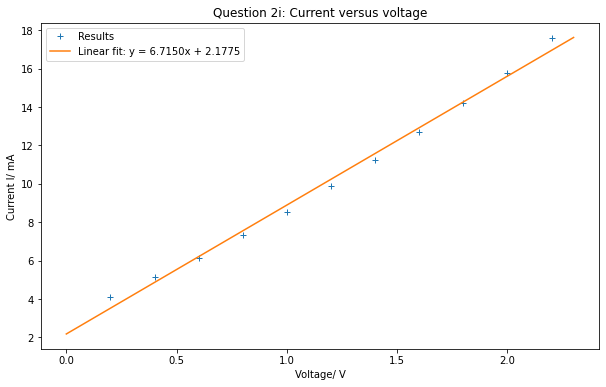

In [244]:
V = np.array([0.20, 0.40, 0.60, 0.80, 1.00, 
              1.20, 1.40, 1.60, 1.80, 2.00, 2.20]) # V/ volts
I = np.array([4.10, 5.15, 6.11, 7.31, 8.53, 
              9.90, 11.22,12.69,14.21,15.77,17.60]) #I/ mA
dI = 0.25 #dI/ mA

p = np.polyfit(V,I,1) #1st order, i.e. linear fit
line = np.poly1d(p)
x = np.linspace(0,2.3, 20)
y = line(x)
plt.figure()
plt.plot(V, I, '+', label = 'Results')
plt.plot(x,y, label = f'Linear fit: y = {p[0]:0.4f}x + {p[1]:0.4f}')
plt.xlabel('Voltage/ V')
plt.ylabel('Current I/ mA')
plt.title('Question 2i: Current versus voltage')
plt.legend();

# 2.ii.
<p>Null hypothesis: linear fit is an appropriate description of the results.
<p>Alternative hypothesis: linear fit is not an appropriate description of the results.
<p>The questions asks us to "calculate the $\chi^2$ probability for the fit.".
<p>For this measure, the following probability from “Measurements and their Uncertainties” by Hughes and Hase has been used:
<p>
    $$P(\chi_{min}^2;v)$$   
<p>This is the "probability of obtaining a value of $\chi_{min}^2$ equal to the fit value or higher." 
<p>"For a reasonable fit $P(\chi_{min}^2;v)\approx 0.5$"
<p>This was calculated using chi2.sf function from scipy.stats.distributions. 

In [344]:
# Question 2 ii.
res = I - line(V)# residuals
res_y = res/dI # residuals divided by y error dI to normalise
chi_2 = np.sum(res_y**2)
deg = len(V) - 2
# degrees of freedom= no. of points - fit parameters (two for linear)
chi_2_red = chi_2/deg
chi_2_prob = chi2.sf(chi_2,deg)
print(f'Chi-squared statistic: {chi_2:0.2f}')
print(f'Reduced Chi-squared statistic: {chi_2_red:0.2f}')
print(f'Chi-Squared Probability {chi_2_prob:0.2e}')
print('\nAbove statistics shown to 2 decimal places, except Chi-Squared Probability to 3 significant figures.')

Chi-squared statistic: 21.79
Reduced Chi-squared statistic: 2.42
Chi-Squared Probability 9.57e-03

Above statistics shown to 2 decimal places, except Chi-Squared Probability to 3 significant figures.


# 2.ii.
According to “Measurements and their Uncertainties":
<p>The null hypothesis is questioned if, the reduced $\chi^2$, $\chi_v^2 > 2$ for $v\approx10$. This is the case here as v=9.
<p>The null hypothesis is rejected if $P(\chi^2_{min};v) < 10^{-4}$. This is not the case here.
<p>The null hypothesis is questioned if $P(\chi^2_{min};v) \approx 10^{-3}$. Our value of $P(\chi^2_{min};v) \approx 10^{-2}$, so a little better.
    
Overall, it seems the null hypothesis cannot be rejected, but it certainly looks questionable. The largest contributers to $\chi^2$ were the first and last data points.

# 2.iii.

The error bars of 6 points
out of 11 do not cross linear fit line.



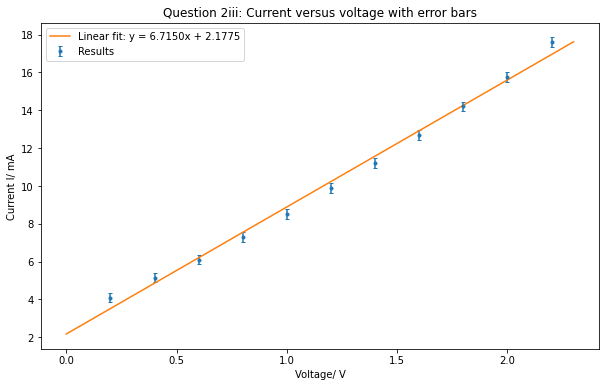

In [247]:
## Question 2 iii.
plt.figure()
plt.errorbar(V, I, yerr=dI, fmt='.', capsize=2,label='Results')
plt.plot(x,y, label = f'Linear fit: y = {p[0]:0.4f}x + {p[1]:0.4f}')
plt.xlabel('Voltage/ V')
plt.ylabel('Current I/ mA')
plt.title('Question 2iii: Current versus voltage with error bars')
plt.legend()
print(f'The error bars of {np.count_nonzero(abs(res) >= dI)} points'),
print(f'out of {len(I)} do not cross linear fit line.\n')
#use of np.count_nonzero adapted from https://note.nkmk.me/en/python-numpy-count/

# 2.iv.
The graphical comparison shows that only a minority of points (5/11) fit the line when taking into account the error bars. With such tight errors bars, there is low confidence that the linear fit is appropriate. 

This has been confirmed by the reduced $\chi^2$ being well above 1 and $P(\chi^2;v) < 0.01$ as calculated in 2 iii.

One possibility is that the error bars have been set too tight. However, there does seem to be a curve in the data and a higher order fit could be considered e.g. quadratic.

# 3.i.

In [316]:
# 3.i
goals = np.array([0,1,2,3,4,5,6,7,8])
fcf_freq = np.array([1,5,9,6,5,2,2,1,0])
st_freq = np.array([2,4,11,5,3,3,4,1,1,])

fcf_mean = np.sum(goals * fcf_freq)/ np.sum(fcf_freq)
fcf_var = np.sum(fcf_freq*(goals - fcf_mean)**2)/ np.sum(fcf_freq)
fcf_std = np.sqrt(fcf_var)# population std as looking at whole season
print(f'FC Franken goals: mean = {fcf_mean:0.4f}, variance = {fcf_var:0.4f}', end='')
print(f', standard deviation = {fcf_std:0.4f}')

st_mean = np.sum(goals * st_freq)/ np.sum(st_freq)
st_var = np.sum(st_freq*(goals - st_mean)**2)/ np.sum(st_freq)
st_std = np.sqrt(st_var)# population std appropriate as looking at whole season
print(f'Stein City goals: mean = {st_mean:0.4f}, variance = {st_var:0.4f}', end ='')
print(f', standard deviation = {st_std:0.4f}')
print('all to 4 decimal places')

FC Franken goals: mean = 2.9032, variance = 2.7326, standard deviation = 1.6530
Stein City goals: mean = 3.1471, variance = 4.0078, standard deviation = 2.0019
all to 4 decimal places


# 3.ii.

In [267]:
# 3.ii
# couldn't find way to factorialize across an array directly
goals_fact = np.array([])
for i in goals: goals_fact = np.append(goals_fact, np.math.factorial(i))

# Poisson frequencies calculated using the formula give in question
# multiplied by the sum of the frequencies to give desired frequencies
fcf_pois = np.sum(fcf_freq)* (fcf_mean ** goals) * np.exp(-fcf_mean)\
/ goals_fact
st_pois = np.sum(st_freq)* (st_mean ** goals) * np.exp(-st_mean) / goals_fact
print('FC Franken Frequencies')
for i in goals:
  print(f'Goals: {goals[i]}, Actual Frequency: {fcf_freq[i]}', end='')
  print(f', Poisson Frequency: {fcf_pois[i]:0.4f} (4dp)')
print('\nStein City Frequencies')
for i in goals:
  print(f'Goals: {goals[i]}, Actual Frequency: {st_freq[i]}', end='')
  print(f', Poisson Frequency: {st_pois[i]:0.4f} (4dp)')


FC Franken Frequencies
Goals: 0, Actual Frequency: 1, Poisson Frequency: 1.7002 (4dp)
Goals: 1, Actual Frequency: 5, Poisson Frequency: 4.9361 (4dp)
Goals: 2, Actual Frequency: 9, Poisson Frequency: 7.1654 (4dp)
Goals: 3, Actual Frequency: 6, Poisson Frequency: 6.9342 (4dp)
Goals: 4, Actual Frequency: 5, Poisson Frequency: 5.0329 (4dp)
Goals: 5, Actual Frequency: 2, Poisson Frequency: 2.9223 (4dp)
Goals: 6, Actual Frequency: 2, Poisson Frequency: 1.4140 (4dp)
Goals: 7, Actual Frequency: 1, Poisson Frequency: 0.5865 (4dp)
Goals: 8, Actual Frequency: 0, Poisson Frequency: 0.2128 (4dp)

Stein City Frequencies
Goals: 0, Actual Frequency: 2, Poisson Frequency: 1.4613 (4dp)
Goals: 1, Actual Frequency: 4, Poisson Frequency: 4.5987 (4dp)
Goals: 2, Actual Frequency: 11, Poisson Frequency: 7.2362 (4dp)
Goals: 3, Actual Frequency: 5, Poisson Frequency: 7.5909 (4dp)
Goals: 4, Actual Frequency: 3, Poisson Frequency: 5.9722 (4dp)
Goals: 5, Actual Frequency: 3, Poisson Frequency: 3.7590 (4dp)
Goals: 

# 3.iii.
The bining task is much easier done in Excel than Python. It was done in Excel to test the logic of the following code.

The following code produces corresponding frequency arrays where bins have poisson frequency >=5. There is a potential shortcoming in the code in the case where there is a long tail of low frequencies which might on their own add up to a bin size of >5. This was not the case with the data for either team.

In [258]:
# 3.iii
fcf_freq_bin = np.array([])# empty array to capture binned frequencies
fcf_pois_bin = np.array([])# empty array to capture binned poisson frequencies
act, pois = 0,0# counter values for last values of actual and poisson freq.
for i in goals:
  pois += fcf_pois[i]
  act += fcf_freq[i]
  if pois >= 5:
    fcf_freq_bin = np.append(fcf_freq_bin, act)
    fcf_pois_bin = np.append(fcf_pois_bin, pois)
    act, pois = 0, 0# reset to zero as has been used in this bin
if pois != 0:
  fcf_freq_bin[-1] += act
  fcf_pois_bin[-1] += pois
print('FC Franken goal frequencies in bins >=5')
for i in range(len(fcf_freq_bin)):
  print(f'Actual Frequency: {fcf_freq_bin[i]}, Poisson Frequency: ', end ='')
  print(f'{fcf_pois_bin[i]:0.4f} (4dp)')

st_freq_bin = np.array([])# empty array to capture binned frequencies
st_pois_bin = np.array([])# empty array to capture binned poisson frequencies
act, pois = 0,0# counter values for last values of actual and poisson freq.
for i in goals:
  pois += st_pois[i]
  act += st_freq[i]
  if pois >= 5:
    st_freq_bin = np.append(st_freq_bin, act)
    st_pois_bin = np.append(st_pois_bin, pois)
    act, pois = 0, 0# reset to zero as has been used in this bin
if pois != 0:
  st_freq_bin[-1] += act
  st_pois_bin[-1] += pois
print('\nStein City goal frequencies in bins >=5')
for i in range(len(st_freq_bin)):
  print(f'Actual Frequency: {st_freq_bin[i]}, Poisson Frequency: ', end ='')
  print(f'{st_pois_bin[i]:0.4f} (4dp)')

FC Franken goal frequencies in bins >=5
Actual Frequency: 6.0, Poisson Frequency: 6.6364 (4dp)
Actual Frequency: 9.0, Poisson Frequency: 7.1654 (4dp)
Actual Frequency: 6.0, Poisson Frequency: 6.9342 (4dp)
Actual Frequency: 5.0, Poisson Frequency: 5.0329 (4dp)
Actual Frequency: 5.0, Poisson Frequency: 5.1357 (4dp)

Stein City goal frequencies in bins >=5
Actual Frequency: 6.0, Poisson Frequency: 6.0599 (4dp)
Actual Frequency: 11.0, Poisson Frequency: 7.2362 (4dp)
Actual Frequency: 5.0, Poisson Frequency: 7.5909 (4dp)
Actual Frequency: 3.0, Poisson Frequency: 5.9722 (4dp)
Actual Frequency: 9.0, Poisson Frequency: 6.9657 (4dp)


In [325]:
fcf_chi2 = np.sum(((fcf_freq_bin - fcf_pois_bin)/ np.sqrt(fcf_pois_bin))**2)
st_chi2 = np.sum(((st_freq_bin - st_pois_bin)/ np.sqrt(st_pois_bin))**2)
deg = 4# each has 5 bins and there is one fit parameter, the mean.
print('FC Franken')
print(f'Chi-squared: {fcf_chi2:0.2f}')
print(f'Reduced chi-squared: {fcf_chi2/deg:0.2f}')
print(f'Chi-squared probability: {chi2.sf(fcf_chi2,deg):0.2f}')
print('\nStein City')
print(f'Chi-squared: {st_chi2:0.2f}')
print(f'Reduced chi-squared: {st_chi2/deg:0.2f}')
print(f'Chi-squared probability: {chi2.sf(st_chi2,deg):0.2f}')

FC Franken
Chi-squared: 0.66
Reduced chi-squared: 0.17
Chi-squared probability: 0.96

Stein City
Chi-squared: 4.92
Reduced chi-squared: 1.23
Chi-squared probability: 0.30


# 3.iii.
FC Franken has a low $\chi_{v}^2$ and $P(\chi^2)$ close to unity. This indicates an "improbably good fit" as described in Note 2 from the problem sheet. It is not a problem of number of parameters as only one has been used, the mean. It is more likely to result from the error approximation being inaccurate.

Stein City, on the other hand has a better fit with $\chi_{v}^2$ close to 1 and $P(\chi^2)$ not as far away from 0.5.

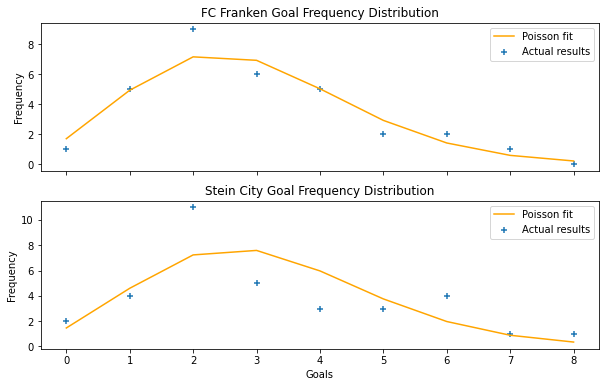

In [260]:
#3.iv
fig, axs = plt.subplots(2, sharex=True)
axs[0].scatter(goals, fcf_freq, label= 'Actual results', marker = '+')
axs[0].plot(goals, fcf_pois, label = 'Poisson fit', color ='orange')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].set_title('FC Franken Goal Frequency Distribution')
axs[1].scatter(goals, st_freq, label= 'Actual results', marker = '+')
axs[1].plot(goals, st_pois, label = 'Poisson fit', color ='orange')
axs[1].legend()
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Goals')
axs[1].set_title('Stein City Goal Frequency Distribution');

# 4.i
In this question, there are uncertainties in both the dependent and independent variables. A review of "Measurements and Their Uncertainties" Chapter 9, "Topics for Further Study" shows that this is a complex area with different approaches possible.
<p>Instead, it was decided to ignore the errors in the angle. The justification for this is that they are smaller than for the R coefficients as a percentage. Angle error percentages range from 0.6% to 5.0%, whereas those for R vary from 2.4% to 25.0% (once you have excluded three points close to Brewster angle).

In [9]:
# 4. i
theta1_per = np.array([10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])
#data for theta 1 in degrees
r2_par = np.array([0.034,0.032,0.029,0.026,0.022,0.018,0.013,0.008,0.003,0.001,
                   0.003,0.014,0.043,0.104,0.231,0.471])
#data for R-squared parallel
r2_per = np.array([0.040, 0.042,0.046,0.051,0.057,0.066,0.078,0.094,0.116,0.146,
                   0.188,0.245,0.328,0.443,0.606,0.828])
#data for R-Squared perpendicular
brew = 57#brewster angle 57 degrees
angle_err = 0.5#angle error in degrees
r_err = 0.002#error in R coefficients

n_p = np.tan(brew*np.pi/180)# est. of refractive index using Brewster law
print(f'Estimate of n(Perspex) using Brewster: {n_p:0.2f}')
n_p2 = (1+np.sqrt(0.037))/(1-np.sqrt(0.037))# second estimate
#using expression for average value of coefficients as theta tends to zero.
#average of 0.034 and 0.040 = 0.037
print(f'Estimate of n(Perspex) using low theta limit: {n_p2:0.2f}')
      
#Exclusion of data points less than 3 error bars from zero (0.06)
#happens for r2_par at 50,55 and 60 degrees only
#manually delete these items and add a new theta array to match
theta1_par = np.array([10,15,20,25,30,35,40,45,65,70,75,80,85])
r2_par = np.array([0.034,0.032,0.029,0.026,0.022,0.018,0.013,0.008,0.014,0.043,
                   0.104,0.231,0.471])

#1. Convert theta1 arrays to radians
theta1_per = theta1_per* np.pi/180
theta1_par = theta1_par* np.pi/180

#2. Calculate theta2 arrays using Snell's law
#theta2 is other angle required in Fresnel relations
theta2_per = np.arcsin(np.sin(theta1_per)/n_p)
theta2_par = np.arcsin(np.sin(theta1_par)/n_p)

#3. Calculate theoretical values of R-Squared perpendicular and R-squared parallel
#using Fresnel relations
r2_per_t = ((np.cos(theta1_per) - n_p * np.cos(theta2_per)) / \
            (np.cos(theta1_per) + n_p * np.cos(theta2_per)))**2
r2_par_t = ((n_p* np.cos(theta1_par) - np.cos(theta2_par)) / \
            (n_p* np.cos(theta1_par) + np.cos(theta2_par)))**2


#4. Fit for all valid data, therefore concatenate arrays
r2 = np.concatenate((r2_per, r2_par))
r2_t = np.concatenate((r2_per_t, r2_par_t))

#5. Calculate chi-squared
chi_sqr = np.sum(((r2-r2_t)/r_err)**2)
print('\nFor n(Perspex) from Brewster')
print(f'Chi-squared statistic: {chi_sqr:0.2f}')

#6. Degrees of freedom
deg = len(r2) - 1# there is only one fit parameter in Fresnel equations, n
print('Degrees of freedom:', deg)

#7. Chi-Squared Probability
print('Chi-squared probability:', chi2.sf(chi_sqr,deg))

print('\nn values and chi-squared statistic presented to 2 decimal places')


Estimate of n(Perspex) using Brewster: 1.54
Estimate of n(Perspex) using low theta limit: 1.48

For n(Perspex) from Brewster
Chi-squared statistic: 3053.75
Degrees of freedom: 28
Chi-squared probability: 0.0

n values and chi-squared statistic presented to 2 decimal places


# 4.i.
The $\chi^2$ statistic is massive and so large that $P(\chi^2)$ returns 0.0. Our estimate of n is providing a very poor fit. The problem appears to be the error band is too narrow, particularly for large values of $\theta_1$. Let's calculate the effect of the uncertainty of $\theta_1$ on the reflection coefficients and then include the measurement error to give a total error array.

In [15]:
dtheta1 = 0.5 * np.pi/180#error in theta1 in radians
theta1_plus = theta1_per + dtheta1#array with theta1 errors added
theta1_minus = theta1_per - dtheta1#array with theta1 errors subtracted

#calculate theta2 for the two scenarios
theta2_plus = np.arcsin(np.sin(theta1_plus)/n_p)
theta2_minus = np.arcsin(np.sin(theta1_minus)/n_p)

#Calculate theoretical values of R-Squared perpendicular and R-squared parallel
#for the 2 scenarios using Fresnel relations
r2_per_plus = ((np.cos(theta1_plus) - n_p * np.cos(theta2_plus)) / \
               (np.cos(theta1_plus) + n_p * np.cos(theta2_plus)))**2
r2_per_minus = ((np.cos(theta1_minus) - n_p * np.cos(theta2_minus)) / \
                (np.cos(theta1_minus) + n_p * np.cos(theta2_minus)))**2
r2_par_plus = ((n_p* np.cos(theta1_plus) - np.cos(theta2_plus)) / \
               (n_p* np.cos(theta1_plus) + np.cos(theta2_plus)))**2
r2_par_minus = ((n_p* np.cos(theta1_minus) - np.cos(theta2_minus)) / \
                (n_p* np.cos(theta1_minus) + np.cos(theta2_minus)))**2

#calculating error as half the range between the two scenarios
#then propagating this error term with measurement error
r2_per_err = np.sqrt(((r2_per_plus - r2_per_minus)/2)**2 + 0.002**2)
r2_par_err = np.sqrt(((r2_par_plus - r2_par_minus)/2)**2 + 0.002**2)

#method to recalculate "par" arrays now with 50,55,60 angles excluded
#same angles excluded, can use theta1_par as previously defined
theta1_plus = theta1_par + dtheta1
theta1_minus = theta1_par - dtheta1
theta2_plus = np.arcsin(np.sin(theta1_plus)/n_p)
theta2_minus = np.arcsin(np.sin(theta1_minus)/n_p)
r2_par_plus = ((n_p* np.cos(theta1_plus) - np.cos(theta2_plus)) / \
               (n_p* np.cos(theta1_plus) + np.cos(theta2_plus)))**2
r2_par_minus = ((n_p* np.cos(theta1_minus) - np.cos(theta2_minus)) / \
                (n_p* np.cos(theta1_minus) + np.cos(theta2_minus)))**2
r2_par_err = np.sqrt(((r2_par_plus - r2_par_minus)/2)**2 + 0.002**2)
r2_par = np.array([0.034,0.032,0.029,0.026,0.022,0.018,0.013,0.008,0.014,0.043,
                   0.104,0.231,0.471])


# Calculate theta2 arrays using Snell's law
theta2_per = np.arcsin(np.sin(theta1_per)/n_p)
theta2_par = np.arcsin(np.sin(theta1_par)/n_p)

# Calculate theoretical R-Squared perpendicular and R-squared parallel
# using Fresnel relations
r2_per_t = ((np.cos(theta1_per) - n_p * np.cos(theta2_per)) / \
            (np.cos(theta1_per) + n_p * np.cos(theta2_per)))**2
r2_par_t = ((n_p* np.cos(theta1_par) - np.cos(theta2_par)) / \
            (n_p* np.cos(theta1_par) + np.cos(theta2_par)))**2

# Fit for all valid data, therefore concatenate arrays
r2 = np.concatenate((r2_per, r2_par))
r2_t = np.concatenate((r2_per_t, r2_par_t))
r_err = np.concatenate((r2_per_err, r2_par_err))

# Calculate chi-squared
chi_sqr = np.sum(((r2-r2_t)/r_err)**2)
print(f'Chi-squared statistic: {chi_sqr:0.2f} (2dp)')

#3. Degrees of freedom
deg = len(r2) - 1# there is only one fit parameter in Fresnel equations, n
print('Degrees of freedom:', deg)

#4. Chi-Squared Probability
print(f'Chi-squared probability: {chi2.sf(chi_sqr,deg):0.2e} (3sf)')

Chi-squared statistic: 228.17 (2dp)
Degrees of freedom: 28
Chi-squared probability: 2.86e-33 (3sf)


# 4.i.
The $\chi^2$ statistic is large and $P(\chi^2)$ small, so n(Perspex) calculated with the Brewster angle is a poor fit. The $\chi^2$ is much lower than previously, so there is a chance that we can minimize $\chi^2$ to a reasonable level.
# 4.ii.
Start with $R_\parallel^2$

In [341]:
# First for R-squared parallel
n_array = np.linspace(1.4,1.6,21)#1.40 to 1.60 in steps of 0.01
for n_p in n_array:
    theta2_per = np.arcsin(np.sin(theta1_per)/n_p)
    theta2_par = np.arcsin(np.sin(theta1_par)/n_p)
    r2_per_t = ((np.cos(theta1_per) - n_p * np.cos(theta2_per)) / \
                (np.cos(theta1_per) + n_p * np.cos(theta2_per)))**2
    r2_par_t = ((n_p* np.cos(theta1_par) - np.cos(theta2_par)) / \
                (n_p* np.cos(theta1_par) + np.cos(theta2_par)))**2
    r2 = r2_par
    r2_t = r2_par_t
    r_err = r2_par_err
    chi_sqr = np.sum(((r2-r2_t)/r_err)**2)
    deg = len(r2) - 1# there is only one fit parameter in Fresnel equations, n
    print(f'n: {n_p}\tChi-s: {chi_sqr:0.2f}\tP: {chi2.sf(chi_sqr,deg):0.2e}')    

n: 1.4	Chi-s: 63.42	P: 5.34e-09
n: 1.41	Chi-s: 46.48	P: 5.74e-06
n: 1.42	Chi-s: 32.03	P: 1.37e-03
n: 1.43	Chi-s: 20.22	P: 6.31e-02
n: 1.44	Chi-s: 11.16	P: 5.15e-01
n: 1.45	Chi-s: 5.00	P: 9.58e-01
n: 1.46	Chi-s: 1.87	P: 1.00e+00
n: 1.47	Chi-s: 1.89	P: 1.00e+00
n: 1.48	Chi-s: 5.18	P: 9.52e-01
n: 1.49	Chi-s: 11.87	P: 4.56e-01
n: 1.5	Chi-s: 22.07	P: 3.67e-02
n: 1.51	Chi-s: 35.90	P: 3.36e-04
n: 1.52	Chi-s: 53.48	P: 3.39e-07
n: 1.53	Chi-s: 74.90	P: 3.83e-11
n: 1.54	Chi-s: 100.29	P: 4.89e-16
n: 1.55	Chi-s: 129.73	P: 6.98e-22
n: 1.56	Chi-s: 163.34	P: 1.10e-28
n: 1.57	Chi-s: 201.21	P: 1.84e-36
n: 1.58	Chi-s: 243.43	P: 3.21e-45
n: 1.59	Chi-s: 290.09	P: 5.63e-55
n: 1.6	Chi-s: 341.29	P: 9.61e-66


# 4.ii.
Lowest $\chi^2 = 1.87$ when n = 1.46 and $P(\chi^2) = 1.00$
<p>According to "Measurements and their Uncertainities" a good fit occurs when $P(\chi^2) \approx 0.5$ and $\chi^2 \approx$ degrees of freedom (12). These occur when n=1.44 and 1.49. True value of n is probably within this range.
<p>Now try $R_\perp^2$

In [342]:
# Now for R-squared parallel
n_array = np.linspace(1.4,1.6,21)#1.40 to 1.60 in steps of 0.01
for n_p in n_array:
    theta2_per = np.arcsin(np.sin(theta1_per)/n_p)
    theta2_par = np.arcsin(np.sin(theta1_par)/n_p)
    r2_per_t = ((np.cos(theta1_per) - n_p * np.cos(theta2_per)) / \
                (np.cos(theta1_per) + n_p * np.cos(theta2_per)))**2
    r2_par_t = ((n_p* np.cos(theta1_par) - np.cos(theta2_par)) / \
                (n_p* np.cos(theta1_par) + np.cos(theta2_par)))**2
    r2 = r2_per
    r2_t = r2_per_t
    r_err = r2_per_err
    chi_sqr = np.sum(((r2-r2_t)/r_err)**2)
    deg = len(r2) - 1# there is only one fit parameter in Fresnel equations, n
    print(f'n: {n_p}\tChi-s: {chi_sqr:0.2f}\tP: {chi2.sf(chi_sqr,deg):0.2e}')    

n: 1.4	Chi-s: 1010.96	P: 6.03e-206
n: 1.41	Chi-s: 850.40	P: 1.44e-171
n: 1.42	Chi-s: 704.70	P: 1.85e-140
n: 1.43	Chi-s: 573.93	P: 1.22e-112
n: 1.44	Chi-s: 458.13	P: 3.96e-88
n: 1.45	Chi-s: 357.35	P: 6.08e-67
n: 1.46	Chi-s: 271.62	P: 4.27e-49
n: 1.47	Chi-s: 200.97	P: 1.35e-34
n: 1.48	Chi-s: 145.40	P: 1.97e-23
n: 1.49	Chi-s: 104.93	P: 1.50e-15
n: 1.5	Chi-s: 79.56	P: 8.40e-11
n: 1.51	Chi-s: 69.28	P: 6.00e-09
n: 1.52	Chi-s: 74.08	P: 8.31e-10
n: 1.53	Chi-s: 93.93	P: 1.82e-13
n: 1.54	Chi-s: 128.82	P: 3.62e-20
n: 1.55	Chi-s: 178.71	P: 4.33e-30
n: 1.56	Chi-s: 243.56	P: 2.62e-43
n: 1.57	Chi-s: 323.34	P: 7.75e-60
n: 1.58	Chi-s: 417.99	P: 1.14e-79
n: 1.59	Chi-s: 527.47	P: 8.65e-103
n: 1.6	Chi-s: 651.72	P: 3.56e-129


# 4.ii
Lowest $\chi^2 = 69.28$ when n = 1.51 and $P(\chi^2) = 6.00 * 10^{-9}$.
<p>With such a low $P(\chi^2)$, we would reject the hypothesis that the Fresnel relation can explain the data for $R_\perp^2$.
<p>Now try both $R_\parallel^2$ and $R_\perp^2$ together:

In [343]:
# Now for both
n_array = np.linspace(1.4,1.6,21)#1.40 to 1.60 in steps of 0.01
for n_p in n_array:
    theta2_per = np.arcsin(np.sin(theta1_per)/n_p)
    theta2_par = np.arcsin(np.sin(theta1_par)/n_p)
    r2_per_t = ((np.cos(theta1_per) - n_p * np.cos(theta2_per)) / \
                (np.cos(theta1_per) + n_p * np.cos(theta2_per)))**2
    r2_par_t = ((n_p* np.cos(theta1_par) - np.cos(theta2_par)) / \
                (n_p* np.cos(theta1_par) + np.cos(theta2_par)))**2
    r2 = np.concatenate((r2_per, r2_par))
    r2_t = np.concatenate((r2_per_t, r2_par_t))
    r_err = np.concatenate((r2_per_err, r2_par_err))
    chi_sqr = np.sum(((r2-r2_t)/r_err)**2)
    deg = len(r2) - 1# there is only one fit parameter in Fresnel equations, n
    print(f'n: {n_p}\tChi-s: {chi_sqr:0.2f}\tP: {chi2.sf(chi_sqr,deg):0.2e}')    

n: 1.4	Chi-s: 1074.38	P: 2.57e-208
n: 1.41	Chi-s: 896.88	P: 8.64e-171
n: 1.42	Chi-s: 736.73	P: 4.01e-137
n: 1.43	Chi-s: 594.14	P: 2.27e-107
n: 1.44	Chi-s: 469.29	P: 1.38e-81
n: 1.45	Chi-s: 362.36	P: 8.10e-60
n: 1.46	Chi-s: 273.49	P: 4.24e-42
n: 1.47	Chi-s: 202.86	P: 1.97e-28
n: 1.48	Chi-s: 150.58	P: 9.68e-19
n: 1.49	Chi-s: 116.80	P: 8.18e-13
n: 1.5	Chi-s: 101.63	P: 2.75e-10
n: 1.51	Chi-s: 105.18	P: 7.20e-11
n: 1.52	Chi-s: 127.55	P: 1.16e-14
n: 1.53	Chi-s: 168.84	P: 4.56e-22
n: 1.54	Chi-s: 229.11	P: 1.88e-33
n: 1.55	Chi-s: 308.44	P: 5.16e-49
n: 1.56	Chi-s: 406.90	P: 7.70e-69
n: 1.57	Chi-s: 524.55	P: 5.86e-93
n: 1.58	Chi-s: 661.42	P: 2.24e-121
n: 1.59	Chi-s: 817.57	P: 4.33e-154
n: 1.6	Chi-s: 993.02	P: 4.30e-191


# 4.ii
Lowest $\chi^2 = 101.63$ when n = 1.50 and $P(\chi^2) = 2.75 * 10^{-10}$.
<p>With such a low $P(\chi^2)$, we would reject the hypothesis that the Fresnel relation can explain the data for both.
<p>This is caused by the poor fit for $R_\perp^2$. So for example, the minimum of $\chi^2 = 101.63$ is just the sum of the $\chi^2$ values for $R_\perp^2$ and $R_\parallel^2$ at n = 1.50.

# 4.iii
The data suggest that only $R_\parallel^2$ is described well by its Fresnel relation. Good fits for the data were found in the range of n = 1.44 to 1.49, the lowest value of $\chi^2 = 1.87$ when n = 1.46.
<p>This suggests that the Brewster angle was indeed crudely measured, as this predicted a value of n =1.54. On the other hand, the low theta relationship predicted n = 1.48.
<p>Neither $R_\perp^2$ or the two statistics combined are well explained by the Fresnel relations, although they do have their $\chi^2$ minima at similar levels, n = 1.51 and n = 1.50 respectively.
<p>Perhaps, reflections don't just occur only at the surface but may occur inside the perspex. This could cause interference and make the Fresnel relations less valid. Perhaps, this is particularly the case for perpendicular polarizations. They may be more prone to interior reflection due to how they interact with the internal layers within the perspex. 